In [1]:
#!pip install -q git+https://github.com/huggingface/transformers.git

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation 

In [1]:
import torch
import requests
from PIL import Image
from transformers import RTDetrForObjectDetection, RTDetrImageProcessor

model_name = "PekingU/rtdetr_r50vd_coco_o365"
image_processor = RTDetrImageProcessor.from_pretrained(model_name)
model = RTDetrForObjectDetection.from_pretrained(model_name)

In [2]:
image = Image.open('/home/juan-carlos/Dropbox/Object_detection_Pele/frame_180.png')
inputs = image_processor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
results = image_processor.post_process_object_detection(outputs, target_sizes=torch.tensor([image.size[::-1]]), threshold=0.6)
     

In [3]:
for result in results:
    for score, label_id, box in zip(result["scores"], result["labels"], result["boxes"]):
        score, label = score.item(), label_id.item()
        box = [round(i, 2) for i in box.tolist()]
        print(f"{model.config.id2label[label]}: {score:.2f} {box}")

person: 0.91 [154.53, 193.15, 245.84, 303.52]
person: 0.90 [38.17, 282.53, 93.59, 410.22]
person: 0.85 [237.03, 269.37, 351.78, 379.54]
person: 0.84 [508.42, 99.64, 573.5, 203.44]


In [4]:
from transformers import pipeline

pipe = pipeline(model=model_name)
pipe(image)

[{'score': 0.9146241545677185,
  'label': 'person',
  'box': {'xmin': 154, 'ymin': 193, 'xmax': 245, 'ymax': 303}},
 {'score': 0.8957120180130005,
  'label': 'person',
  'box': {'xmin': 38, 'ymin': 282, 'xmax': 93, 'ymax': 410}},
 {'score': 0.847995400428772,
  'label': 'person',
  'box': {'xmin': 237, 'ymin': 269, 'xmax': 351, 'ymax': 379}},
 {'score': 0.8434728384017944,
  'label': 'person',
  'box': {'xmin': 508, 'ymin': 99, 'xmax': 573, 'ymax': 203}}]

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_bbox(image, data):
   # Create a figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    for result in results:
        for score, label_id, box in zip(result["scores"], result["labels"], result["boxes"]):
            # Unpack the bounding box coordinates
            x1, y1, x2, y2 = box
            # Create a Rectangle patch
            rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
            # Add the rectangle to the Axes
            ax.add_patch(rect)
            # Annotate the label
            label = model.config.id2label[label_id.item()]
            plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

        # Remove the axis ticks and labels
        ax.axis('off')

    # Show the plot
    plt.show()

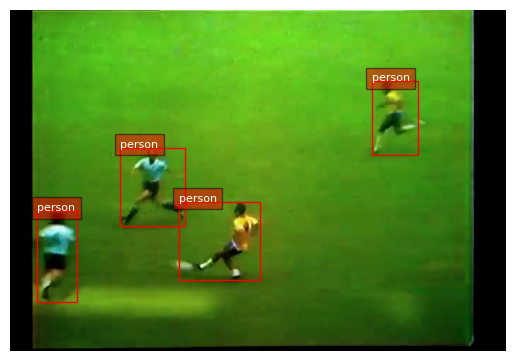

In [6]:
plot_bbox(image,results)

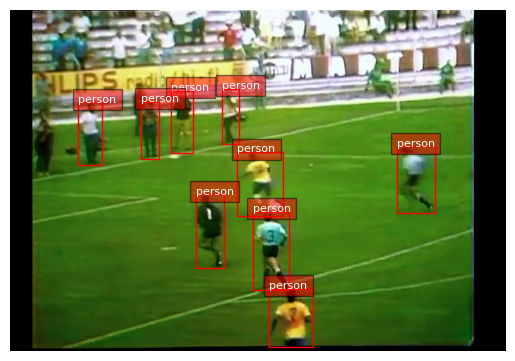

In [7]:
image = Image.open('/home/juan-carlos/Dropbox/Object_detection_Pele/frame_290.png')
inputs = image_processor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
results = image_processor.post_process_object_detection(outputs, target_sizes=torch.tensor([image.size[::-1]]), threshold=0.6)
plot_bbox(image,results)

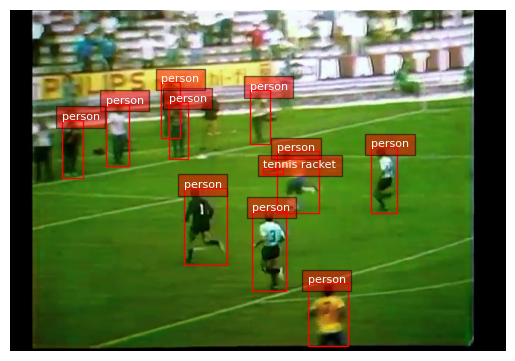

In [8]:
image = Image.open('/home/juan-carlos/Dropbox/Object_detection_Pele/frame_295.png')
inputs = image_processor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
results = image_processor.post_process_object_detection(outputs, target_sizes=torch.tensor([image.size[::-1]]), threshold=0.6)
plot_bbox(image,results)